In [1]:
# https://brainflow.readthedocs.io/en/stable/Examples.html#python-signal-filtering
import brainflow
import numpy as np
import time

import pandas as pd
import matplotlib.pyplot as plt

from brainflow.board_shim import BoardShim, BrainFlowInputParams, LogLevels, BoardIds
from brainflow.data_filter import DataFilter, FilterTypes, AggOperations, NoiseTypes

In [5]:
# create board object and get sample data
params = BrainFlowInputParams()
# board_id = BoardIds.SYNTHETIC_BOARD.value
# board_id = BoardIds.ANT_NEURO_EE_411_BOARD.value
board_id = BoardIds.ANT_NEURO_EE_224_BOARD.value

board = BoardShim(board_id, params)
BoardShim.enable_dev_board_logger()

board.prepare_session()
board.config_board("sampling_rate:2000")


''

In [6]:
board.start_stream()
time.sleep(1)
data = board.get_board_data()
board.stop_stream()
board.release_session()
# board.get_sampling_rate(board_id)

<Figure size 432x288 with 0 Axes>

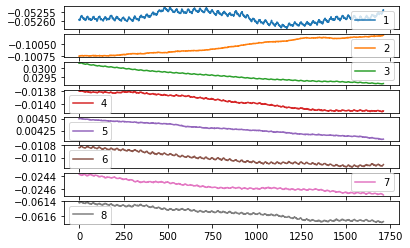

In [7]:
# demo how to convert it to pandas DF and plot data
eeg_channels = BoardShim.get_eeg_channels(board_id)
df = pd.DataFrame(np.transpose(data))
plt.figure()
df[eeg_channels].plot(subplots=True)
plt.savefig('before_processing.png')

<Figure size 432x288 with 0 Axes>

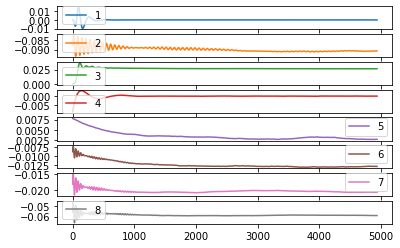

In [4]:
# for demo apply different filters to different channels, in production choose one
for count, channel in enumerate(eeg_channels):
    # filters work in-place
    if count == 0:
        DataFilter.perform_bandpass(data[channel], BoardShim.get_sampling_rate(board_id), 15.0, 6.0, 4,
                                    FilterTypes.BESSEL.value, 0)
    elif count == 1:
        DataFilter.perform_bandstop(data[channel], BoardShim.get_sampling_rate(board_id), 30.0, 1.0, 3,
                                    FilterTypes.BUTTERWORTH.value, 0)
    elif count == 2:
        DataFilter.perform_lowpass(data[channel], BoardShim.get_sampling_rate(board_id), 20.0, 5,
                                   FilterTypes.CHEBYSHEV_TYPE_1.value, 1)
    elif count == 3:
        DataFilter.perform_highpass(data[channel], BoardShim.get_sampling_rate(board_id), 3.0, 4,
                                    FilterTypes.BUTTERWORTH.value, 0)
    elif count == 4:
        DataFilter.perform_rolling_filter(data[channel], 3, AggOperations.MEAN.value)
    else:
        DataFilter.remove_environmental_noise(data[channel], BoardShim.get_sampling_rate(board_id), NoiseTypes.SIXTY.value)

df = pd.DataFrame(np.transpose(data))
plt.figure()
df[eeg_channels].plot(subplots=True)
plt.savefig('after_processing.png')